# Practice Session 01+02: Data preparation

Data scientists [spend a big chunk of their time preparing data](https://blog.ldodds.com/2020/01/31/do-data-scientists-spend-80-of-their-time-cleaning-data-turns-out-no/) and this is one of the first steps in any data mining project. This step is normally called **data preparation**.

The processes of getting an initial understanding of a dataset and preparing it usually go hand-in-hand, and it is critical to perform them well to obtain valid results later. Plus, you can save time and effort by learning how to do proper data preparation.

In this session, we will assume you just received a new dataset and need to do some initial steps with it:

1) Exploratory Data Analysis

* Calculate basis statistics as mean, median, variance, maximum and minimum
* Look at distributions, identify outliers
* Calculate correlations between variables

2) Feature engineering:

* Deal with missing values
* Standardize all numerical columns
* Convert categorical columns to dummy binary variables
* Date and period management
* Feature generation

*Tip*: This process has several steps. It is tempting to maintain a single variable throughout the entire cleaning process, and do something like `x = x.step1()` then `x = x.step2()`. This will create problems for you because if you go back and re-execute a cell it might fail to operate on already transformed data. A better approach in cases like this where you do not have memory problems, is to do `x1 = x.step1()`, `x2 = x1.step2()` and so on, i.e., create a new variable after each transformation or set of transformations.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

Author: <font color="blue">Bernat Quintillà Castellón</font>

E-mail: <font color="blue">bernat.quintilla01@estudiant.upf.edu</font>

Date: <font color="blue">The current date here</font>

# 0. The dataset

The dataset, contained in `device_db.csv` is a 10000 registers of mobile device purchases around 2019. **Each record in the dataset describes a customer that buys a new mobile telephone**. The attributes are defined as follows:
 
0. PURCHASED_DEVICE: the mobile phone bought by the customer
1. DEVICE_VALUE: the cost of the mobile phone bought by the customer
2. LAST_DEVICE_DATE: the date of the previous mobile device purchase
3. DATA\_TRAFFIC\_MONTH_(1..6): The Mbps of data traffic in the month (-1...-6) used by the customer previous to the mobile device purchase
4. VOICE\_TRAFFIC\_MONTH_(1..6): The minutes of voice traffic in the month (-1...-6) used by the customer previous to the mobile device purchase
5. BILLING\_MONTH\_(1..6): Billing (USD) in the month (-1...-6) paid by the customer previous to the mobile device purchase
6. DEVICE\_COST\_MONTH_(1..6): Monthly cost (USD) associated to the mobile device finance in the month (-1...-6) paid by the customer previous to the mobile device purchase: proportion of owner-occupied units built prior to 1940
7. LINE\_ACTIVATION\_DATE: Date of the activation of the mobile line by the customer
8. MONTHS\_LAST\_DEVICE: Number of months of the previous mobile device
9. DURATION\_LINE: Number of months since the customer contracted the mobile line
10. PREVIOUS\_DEVICE\_MODEL: Model of the previous mobile phone
11. PREVIOUS\_DEVICE\_MANUF: Manufacturer of the previous mobile phone
12. PREVIOUS\_DEVICE\_BRAND: Brand of the previous mobile phone

This dataset will be used in next practices as recommendation engines.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

# 1. Exploratory data analysis 

Exploratory Data Analysis (EDA) allows to us to have an understanding of the dataset from a stadistics perspective, i.e., data distribution and correlation between variables. This is crucial to select the most relevant variables for some purpose.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
import sklearn

We open the csv file contaning the data using separator ";" and assign to a dataframe variable (use `read_csv` from the Pandas library).

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [3]:
# LEAVE AS-IS

input_dataset = pd.read_csv("device_db.csv", sep=",")

## 1.1. Data types and simple statistics

In [4]:
input_dataset.head()

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.50000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.70000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.10000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.70000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.89999,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros


Data frames also provide a convenient way of printing data. There are many ways of creating a data frame, one possibility is by creating an array of dictionaries:

```python
countries = []
countries.append({'capital': 'Asuncion', 'country': 'Paraguay'})
countries.append({'capital': 'La Paz', 'country': 'Bolivia'})
countries_df = pd.DataFrame(countries, columns=['country', 'capital'])
display(countries_df)
```

Create a dataframe named `column_type_df` containing the name of each column, its type and the number of distinct elements in that column. To iterate through the columns of dataframe `df`, use `for column in df.columns`; to determine the type of a column, use `df[column].dtype`; to retrieve the number of distinct elements of that column, use `df[column].nunique()`

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to create and display a dataframe containing one row per column, with the type of each column and number of distinct elements of that column.</font>

In [5]:
cols_df_list = []

for column in input_dataset.columns:
    column_name = column
    data_type = input_dataset[column].dtype
    distinct_elem = input_dataset[column].nunique()
  
    cols_df_list.append([column_name, data_type, distinct_elem])
    
column_type_df = pd.DataFrame(cols_df_list, columns=['Column Name', 'Data Type', 'Distinct Elements'])
column_type_df.head()

,Column Name,Data Type,Distinct Elements
0,PURCHASED_DEVICE,object,101
1,DEVICE_VALUE,float64,368
2,LAST_DEVICE_CHANGE,float64,76
3,DATA_TRAFFIC_MONTH_1,float64,7215
4,DATA_TRAFFIC_MONTH_2,float64,7182


To obtain a series from a dataframe you can reference an attribute by name, e.g., `input_dataset.DEVICE_VALUE` returns the series of all device values.

On a series, you can use functions from [numpy](https://numpy.org/doc/) such as `np.mean`, `np.nanmedian` (median ignoring the NaN), `np.std`, `np.min` and `np.max`.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create a dataframe named `stats_df` containing one row per each column of type ``float64`` in the input data, with the name of the column and its mean, median, maximum and minimum.</font>

In [6]:
float_cols = input_dataset.select_dtypes(include=['float64'])

data = []

for column in float_cols.columns:
    col_name = column
    col_mean = np.mean(float_cols[column])
    col_median = np.nanmedian(float_cols[column])
    col_min = np.min(float_cols[column])
    col_max = np.max(float_cols[column])
    
    data.append([col_name, col_mean, col_median, col_min, col_max])

stats_df = pd.DataFrame(data, columns=['Column Name', 'Mean', 'Median', 'Min', 'Max'])

stats_df.head()

,Column Name,Mean,Median,Min,Max
0,DEVICE_VALUE,7.504842e+02,3.930000e+02,15.0,9057.00
1,LAST_DEVICE_CHANGE,2.016698e+07,2.017060e+07,20121001.0,20190501.00
2,DATA_TRAFFIC_MONTH_1,3.481826e+03,1.208728e+03,0.0,127017.59
3,DATA_TRAFFIC_MONTH_2,3.649958e+03,1.294951e+03,0.0,111948.84
4,DATA_TRAFFIC_MONTH_3,3.653427e+03,1.310675e+03,0.0,111948.84


The `describe` function can be used to describe a series. To invoke it simply do `input_dataset.DEVICE_VALUE.describe()`

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to print each column name and then use the `describe` function to print statistics for that column. Include a blank line after each description.</font>

In [7]:
for column in input_dataset.columns:
    print(column, ":\n" , input_dataset[column].describe(),"\n")

PURCHASED_DEVICE :
 count                                                  9853
unique                                                  101
top       TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...
freq                                                   5379
Name: PURCHASED_DEVICE, dtype: object 

DEVICE_VALUE :
 count    9690.000000
mean      750.484211
std       979.710272
min        15.000000
25%       297.000000
50%       393.000000
75%       609.000000
max      9057.000000
Name: DEVICE_VALUE, dtype: float64 

LAST_DEVICE_CHANGE :
 count    7.682000e+03
mean     2.016698e+07
std      1.092577e+04
min      2.012100e+07
25%      2.016080e+07
50%      2.017060e+07
75%      2.017100e+07
max      2.019050e+07
Name: LAST_DEVICE_CHANGE, dtype: float64 

DATA_TRAFFIC_MONTH_1 :
 count      8868.000000
mean       3481.825663
std        6364.542706
min           0.000000
25%          51.923114
50%        1208.728050
75%        4249.164900
max      127017.590000
Name: DATA_TRAFFIC_MONTH_1, dt

<font size="+1" color="red">Replace this cell with a brief commentary comparing the previous results for **DEVICE_COST_MONTH_1** (bill in the first month) with the ones from the **.describe()** function.</font>

<font size="+1" color="red">There are at least two differences, indicate them.</font>

Dels resultats de DEVICE_COST_MONTH_1 respecte els obtinguts amb la funció ```.describe()``` no trobo cap diferència numèrica. Tot i així la funció ```.describe()``` em dona més informació que els previs resultats, ja que mostra el tipus de dades que es troben a la columna i els quartils de la mostra. Podriem treure aquesta informació extra de la funció com les dues diferències entre els resultats.

## 1.2. Inventory of device models

In exploratory data analysis, it is very useful to do an **inventory** or **census** of the possible values of a variable. For us, a census will be a frequency table in which you show the possible values of a variable, and their frequency, in decreasing order of frequency.



<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to display a census of PREVIOUS_DEVICE_MODEL and PREVIOUS_DEVICE_BRAND. You should create and display a dataframe in each case.</font>

In [8]:
previous_model = {}
previous_model_df = []
print("Census of PREVIOUS_DEVICE_MODEL:")
for data in input_dataset.PREVIOUS_DEVICE_MODEL:
    if data not in previous_model.keys():
        previous_model[data] = 0
    previous_model[data] +=1
    
for key in previous_model.keys():
    previous_model_df.append({"Name":key,"Census":previous_model[key]})
    
previous_model_df = pd.DataFrame(previous_model_df,columns=['Name','Census'])
previous_model_df.sort_values("Census",ascending=False).head()

Census of PREVIOUS_DEVICE_MODEL:


,Name,Census
8,NaN,3831
18,iPhone 7,425
3,iPhone 6,250
7,Samsung Galaxy J5,243
10,iPhone 6S,212


In [9]:
previous_brand = {}
previous_brand_df = []
print("Census of PREVIOUS_DEVICE_BRAND:")
for data in input_dataset.PREVIOUS_DEVICE_BRAND:
    if data not in previous_brand.keys():
        previous_brand[data] = 0
    previous_brand[data] +=1
    
for key in previous_brand.keys():
    previous_brand_df.append({"Name":key,"Census":previous_brand[key]})
    
previous_brand_df = pd.DataFrame(previous_brand_df,columns=['Name','Census'])
previous_brand_df.sort_values("Census",ascending=False).head()

Census of PREVIOUS_DEVICE_BRAND:


,Name,Census
4,NaN,3831
1,Samsung,1877
3,Outros,1592
2,Apple,1548
0,Motorola,638


<font size="+1" color="red">The most common device model and the most common device brand do not match, why do you think it is so? Replace this cell with an explanation.</font>

El device model més comú és el iPhone7 seguit del iPhone6, però la device brand més comuna és Samsung. Aquest fet pot haber estat provocat a causa de que molts dataframes de iPhone al camp de brand hi apareix NaN i no la marca iPhone, i això pot haber derivat a que finalment tot i que els models de mòvil de Samsung no ocupen les primeres posicions, es coloquen com a marca líder. Si eliminessim els NaN podriem visualitzar més clarament quina marca és realment la més popular, la qual podria seguir sent Samsung per la seva gran quantitat de models o iPhone pels seus models amb un número tan gran de ventes.

# 2. Feature engineering

Feature engineering is the process of extracting valuable features from the data. This requires pre-processing, combining, normalizing, and performing other operations on the values of some features.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

## 2.1. Missing values management

**Not A Number** (NaN) is a generic term to refer to *something that should be a number, but is not*. Usually, the value is either missing completely ("null") or contains the wrong type of object, such as a string or a concept such as infinity.

To find which columns contain NaN values, you can use the [isna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) function, as explained, e.g., [here](https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab). 

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with your code to print which columns contain at least one NaN value, and how many NaN values are in that column, as well as how many non NaN values are in that column. You should create a dataframe `nan_counter` and display it.</font>

In [10]:
nan_counter = []

for column in input_dataset.columns:
    nan_count = input_dataset[column].isna().sum()
    non_nan_count = input_dataset[column].count()
    if nan_count > 0:
        nan_counter.append([column,nan_count,non_nan_count])
        
nan_counter = pd.DataFrame(nan_counter,columns=['Name','NaN','Non-NaN'])
nan_counter.head()

,Name,NaN,Non-NaN
0,PURCHASED_DEVICE,147,9853
1,DEVICE_VALUE,310,9690
2,LAST_DEVICE_CHANGE,2318,7682
3,DATA_TRAFFIC_MONTH_1,1132,8868
4,DATA_TRAFFIC_MONTH_2,1159,8841


The way **NaNs** are managed varies according to the meaning of each variable. In some occasions, registers should be removed, filled with other columns or calculated (imputed).

* To delete rows containing a null value, we can use [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
* To replace null values, we can use [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

Please note that these steps should be applied sequentially, i.e., the output of one step should be fed into the next step. You can do, for instance: `df02 = df01.operation(...)` followed by `df03 = df02.operation(...)` and so on.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">If there is no **PURCHASED\_DEVICE**, **DEVICE\_VALUE**, or **PREVIOUS\_DEVICE\_MODEL**, the row is useless to us. Replace this cell with code to remove those rows.</font>

In [11]:
df01 = input_dataset.dropna(subset=['PURCHASED_DEVICE','DEVICE_VALUE','PREVIOUS_DEVICE_MODEL'])

<font size="+1" color="red">Any NaN value in **DATA\_TRAFFIC\_MONTH\_(1..6)**, **VOICE\_TRAFFIC\_MONTH_(1..6)**, **BILLING\_MONTH_(1..6)**, or **DEVICE\_COST\_MONTH\_(1..6)** should be assumed to be 0. Replace this cell with code to do that imputation.</font>

In [12]:
df02 = df01.copy()
columns_to_fill = ['DATA_TRAFFIC_MONTH_1', 'DATA_TRAFFIC_MONTH_2', 'DATA_TRAFFIC_MONTH_3',
                     'DATA_TRAFFIC_MONTH_4', 'DATA_TRAFFIC_MONTH_5', 'DATA_TRAFFIC_MONTH_6',
                     'VOICE_TRAFFIC_MONTH_1', 'VOICE_TRAFFIC_MONTH_2', 'VOICE_TRAFFIC_MONTH_3',
                     'VOICE_TRAFFIC_MONTH_4', 'VOICE_TRAFFIC_MONTH_5', 'VOICE_TRAFFIC_MONTH_6',
                     'BILLING_MONTH_1', 'BILLING_MONTH_2', 'BILLING_MONTH_3',
                     'BILLING_MONTH_4', 'BILLING_MONTH_5', 'BILLING_MONTH_6',
                     'DEVICE_COST_MONTH_1', 'DEVICE_COST_MONTH_2', 'DEVICE_COST_MONTH_3',
                     'DEVICE_COST_MONTH_4', 'DEVICE_COST_MONTH_5', 'DEVICE_COST_MONTH_6']
df02[columns_to_fill] = df01[columns_to_fill].fillna(value=0)

<font size="+1" color="red">If there is no **LINE\_ACTIVATION\_DATE**, we will assume it is equal to **LAST\_DEVICE\_CHANGE**. Replace this cell with code to do that imputation.</font>

In [13]:
df03 = df02.copy()
df03['LINE_ACTIVATION_DATE'].fillna(df02['LAST_DEVICE_CHANGE'], inplace=True)

<font size="+1" color="red">Replace this cell with code to print the header and the first ten rows after this processing</font>

In [14]:
df03.head(10)

,PURCHASED_DEVICE,DEVICE_VALUE,LAST_DEVICE_CHANGE,DATA_TRAFFIC_MONTH_1,DATA_TRAFFIC_MONTH_2,DATA_TRAFFIC_MONTH_3,DATA_TRAFFIC_MONTH_4,DATA_TRAFFIC_MONTH_5,DATA_TRAFFIC_MONTH_6,VOICE_TRAFFIC_MONTH_1,...,DEVICE_COST_MONTH_3,DEVICE_COST_MONTH_4,DEVICE_COST_MONTH_5,DEVICE_COST_MONTH_6,LINE_ACTIVATION_DATE,MONTHS_LAST_DEVICE,DURATION_LINE,PREVIOUS_DEVICE_MODEL,PREVIOUS_DEVICE_MANUF,PREVIOUS_DEVICE_BRAND
0,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,393.0,NaN,465.24673,530.80615,530.80615,781.12646,398.99377,1169.39610,47.500000,...,12.0,12.0,12.0,12.0,20041220.0,NaN,172.0,Moto G4 Plus,"Motorola Mobility LLC, a Lenovo Company",Motorola
1,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20170401.0,232.24121,272.25525,272.25525,704.88519,412.71664,365.14441,3.700000,...,0.0,0.0,0.0,0.0,20170405.0,20.0,20.0,Samsung Galaxy J1 Mini,Samsung Korea,Samsung
2,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,875.0,NaN,484.62036,264.13843,264.13843,348.50073,380.44156,250.73566,26.100000,...,0.0,0.0,0.0,0.0,20040412.0,NaN,176.0,Moto E (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
3,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20171001.0,4255.46040,836.11707,836.11707,691.55640,146.76660,302.49249,175.700000,...,6.0,6.0,6.0,6.0,20110825.0,14.0,88.0,iPhone 6,Apple Inc,Apple
4,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,609.0,20190101.0,5014.10300,2659.05150,2659.05150,2435.03930,2053.97950,1553.11500,383.899990,...,0.0,0.0,0.0,0.0,20140617.0,-1.0,54.0,K10a40,"Motorola Mobility LLC, a Lenovo Company",Outros
5,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,297.0,20170901.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,108.500000,...,0.0,0.0,0.0,0.0,20170905.0,15.0,15.0,GL865-QUAD,Telit Communications SpA,Outros
6,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20150701.0,1127.10790,268.22552,268.22552,320.17395,135.45976,212.06636,370.899990,...,0.0,0.0,0.0,0.0,20100809.0,41.0,100.0,Moto G com 4G (2ª Geração),"Motorola Mobility LLC, a Lenovo Company",Motorola
7,DGAP068C2000_APPLE IPHONE 8 256GB CINZA PPB/PI...,3465.0,20170101.0,1520.20560,2196.57450,2196.57450,1815.70090,2101.68160,3224.28340,206.899990,...,13.0,13.0,13.0,13.0,20121029.0,23.0,74.0,iPhone 6,Apple Inc,Apple
8,TGMO35912000_MOTOROLA XT1922 SMARTPHONE INDIGO,415.0,20181101.0,10789.82000,10423.67400,10423.67400,5188.59670,7379.40430,6789.48290,64.300003,...,0.0,0.0,0.0,0.0,20120509.0,1.0,79.0,iPhone 6,Apple Inc,Apple
9,TGLG29162000_LG X210BMW SMARTPHONE PRETO PPB/P...,345.0,20141101.0,793.15601,734.51996,734.51996,156.38121,467.95233,721.30389,2.700000,...,0.0,0.0,0.0,0.0,20141130.0,49.0,49.0,Samsung Galaxy J5,Samsung Korea,Samsung


If `df` is a dataframe, `df.shape` contains a tuple with the number of rows and the number of columns of the data frame. You should now print something like this:

```
Rows in the original dataset: M
Rows in the new dataset: N ((100*(M-N)/M)% less)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to print the number of rows of the original dataset, the number of rows of the new dataset, and the percentage of rows that were dropped, as well as the names of the columns that still contain NaN values, if any.</font>

In [15]:
print('Rows in the original dataset: ',input_dataset.shape[0],'\n')
print('Rows in the new dataset: ',df03.shape[0],'\n')
percentage_rows = 100-(df03.shape[0]/input_dataset.shape[0])*100
print('Percentage of rows dropped: ',percentage_rows,'%\n')

cols_w_nan = []
for column in df03.columns:
    if df03[column].isna().any():
        cols_w_nan.append(column)
print('Names of the columns with NaN values: ',cols_w_nan)

Rows in the original dataset:  10000 

Rows in the new dataset:  5988 

Percentage of rows dropped:  40.12 %

Names of the columns with NaN values:  ['LAST_DEVICE_CHANGE', 'LINE_ACTIVATION_DATE', 'MONTHS_LAST_DEVICE', 'DURATION_LINE']


## 2.2. Distributions, outliers, and correlations

We will now plot the distributions of some variables and apply some transformations.

* You can use [Seaborn library](https://seaborn.pydata.org/) with `kde=False` to create a histogram.
* You can use [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) with `kind='box'` to create a boxplot.
    
<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with a series of cells with code to plot a histogram of **DEVICE\_VALUE**, **VOICE\_TRAFFIC\_MONTH\_1-3** (include a legend, each month should be a different color),  **BILLING\_MONTH\_2**, **DURATION\_LINE**. Remember to include labels on the x axis and y axis</font>

<font size="+1" color="red">Include after each histogram a markdown cell where you indicate if you recognize any specific distribution (normal, exponential, uniform, ...) or any characteristic of the distribution (unimodal, bimodal).</font>

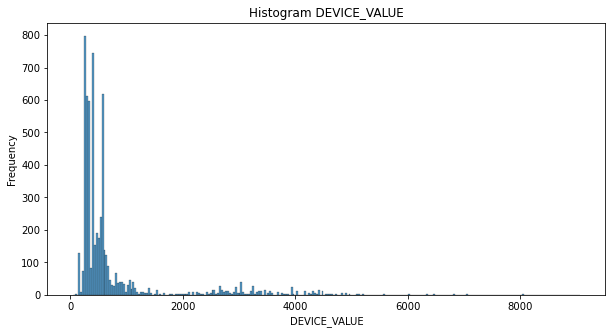

In [16]:
#Histograma DEVICE_VALUE
plt.figure(figsize=(10, 5))
sns.histplot(data=df03, x='DEVICE_VALUE', kde=False)
plt.xlabel('DEVICE_VALUE')
plt.ylabel('Frequency')
plt.title('Histogram DEVICE_VALUE')
plt.show()

En aquest histograma es pot reconèixer una distribució normal amb dos pics de freqüència marcats fent la distribució bimodal.

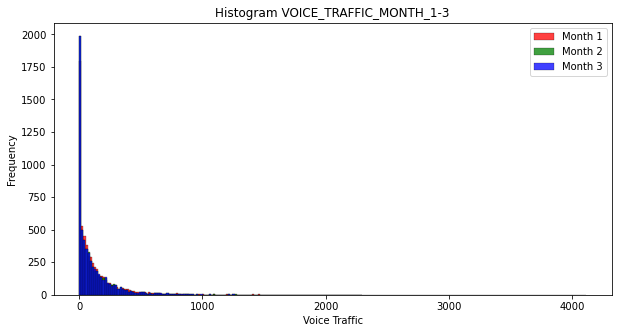

In [17]:
#Histograma VOICE_TRAFFIC_MONTH_1-3
plt.figure(figsize=(10, 5))
sns.histplot(data=df03, x='VOICE_TRAFFIC_MONTH_1', kde=False, color='red', label='Month 1')
sns.histplot(data=df03, x='VOICE_TRAFFIC_MONTH_2', kde=False, color='green', label='Month 2')
sns.histplot(data=df03, x='VOICE_TRAFFIC_MONTH_3', kde=False, color='blue', label='Month 3')
plt.xlabel('Voice Traffic')
plt.ylabel('Frequency')
plt.title('Histogram VOICE_TRAFFIC_MONTH_1-3')
plt.legend()
plt.show()

Es pot identificar de forma clara una distribució exponencial amb un únic pic de freqüència, per tant és una distribució unimodal. Per la forma del histograma podem deduïr que el valor de paràmetre &lambda; de la distribució exponencial és elevat.

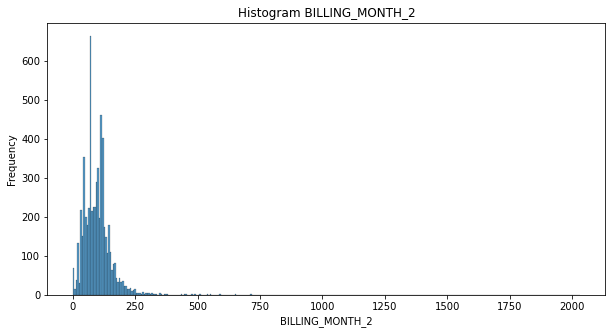

In [18]:
#Histograma BILLING_MONTH_2
plt.figure(figsize=(10, 5))
sns.histplot(data=df03, x='BILLING_MONTH_2', kde=False)
plt.xlabel('BILLING_MONTH_2')
plt.ylabel('Frequency')
plt.title('Histogram BILLING_MONTH_2')
plt.show()

Es pot observar com l'histograma segueix una distribució normal amb un únic pic de freqüència formant una distribució unimodal.

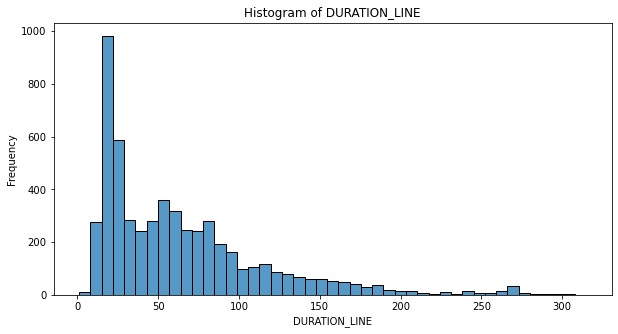

In [19]:
#Histograma DURATION_LINE
plt.figure(figsize=(10, 5))
sns.histplot(data=df03, x='DURATION_LINE', kde=False)
plt.xlabel('DURATION_LINE')
plt.ylabel('Frequency')
plt.title('Histogram of DURATION_LINE')
plt.show()

Es dedueix una distribució exponencial amb un únic pic de freqüència, fent una distribució unimodal. Per la forma del histograma podem deduïr que el valor de paràmetre &lambda; de la distribució exponencial en aquest cas, no és tan elevat respecte l'histograma VOICE_TRAFFIC_MONTH_1-3.

Variables having exponential distribution can be processed and visualized better after transforming them, usually by applying the `log(x+1)` function (we want to avoid zeros, hence the +1).
    
<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to apply **log(x+1)** to **VOICE\_TRAFFIC\_MONTH\_2** and plot its new distribution.</font>

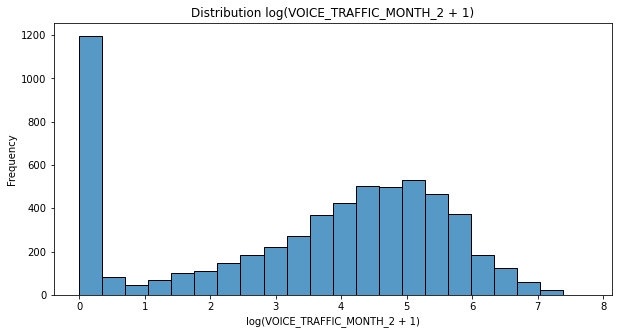

In [20]:
df03['VOICE_TRAFFIC_MONTH_2'] = np.log(df03['VOICE_TRAFFIC_MONTH_2'] + 1)

plt.figure(figsize=(10, 5))
sns.histplot(data=df03, x='VOICE_TRAFFIC_MONTH_2', kde=False)
plt.xlabel('log(VOICE_TRAFFIC_MONTH_2 + 1)')
plt.ylabel('Frequency')
plt.title('Distribution log(VOICE_TRAFFIC_MONTH_2 + 1)')
plt.show()

<font size="+1" color="red">Replace this cell with code to create a boxplot for variables **DATA\_TRAFFIC\_MONTH\_2**, **VOICE\_TRAFFIC\_MONTH\_2** and **BILLING\_MONTH\_2**</font>

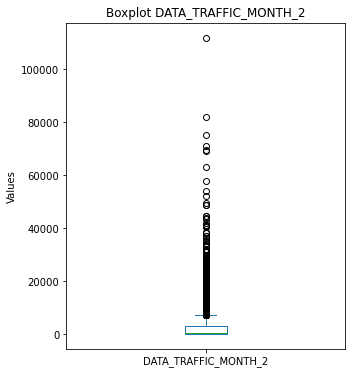

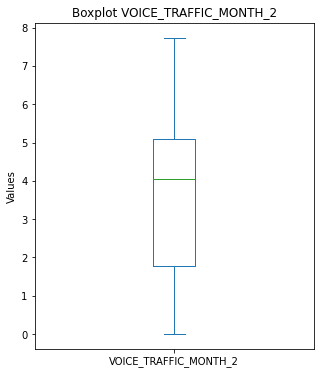

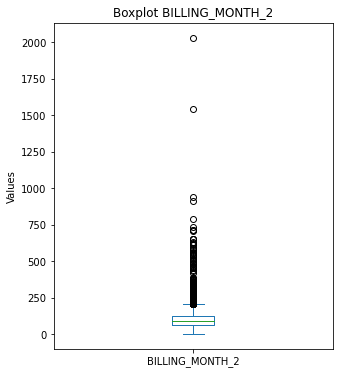

In [21]:
plt.figure(figsize=(5, 6))
df03['DATA_TRAFFIC_MONTH_2'].plot(kind='box')
plt.title('Boxplot DATA_TRAFFIC_MONTH_2')
plt.ylabel('Values')


plt.figure(figsize=(5, 6))
df03['VOICE_TRAFFIC_MONTH_2'].plot(kind='box')
plt.title('Boxplot VOICE_TRAFFIC_MONTH_2')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(5, 6))
df03['BILLING_MONTH_2'].plot(kind='box')
plt.title('Boxplot BILLING_MONTH_2')
plt.ylabel('Values')
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary indicating which extreme values would you use as threshold for **outliers** in these variables, by looking at these box plots</font>

Els valors que usaria com a threshold per els outliers són els bigotis de la caixa. És a dir, que les dades fora del rang ```[Q1-1.5*IQR,Q3+1.5*IQR]```, (sent ```IQR = Q3-Q1```), les consideraria outliers.

In this dataset, there are many dependencies between different attributes, e.g., a large voice traffic will probably be associated with a large data traffic, a more expensive bill, and possibly a more expensive device (`DEVICE_VALUE`).

You can use [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to compute a correlation matrix, and [matplotlib.pyplot.matshow](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.matshow.html) to show this graphically.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to calculate the correlation between all traffic attributes (i.e., voice and data), duration line, billing, device cost and device value. Display the result as a table with rows and columns corresponding to columns, and cells indicating correlations. Display the result as an image using ``matshow``</font>

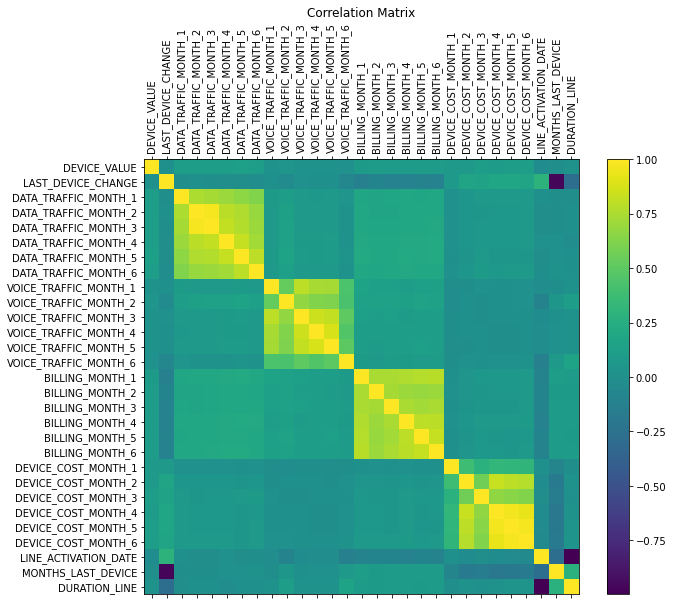

In [22]:
correlation_matrix = df03.corr()

plt.figure(figsize=(10, 8))
ax = plt.gca()
c_ax = ax.matshow(correlation_matrix)
plt.colorbar(c_ax)

plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary on the results. Is the billing more correlated, in general, with the data traffic or with the voice traffic?</font>

!!!!!!!!!!

## 2.3. Date management and period calculation

First, we will determine the date of the `LAST_DEVICE_CHANGE` of the last device that was changed in the entire dataset (i.e., the maximum value of the `LAST_DEVICE_CHANGE` column, plus 30 days). We will refer to that date as `latest_change`.

Note that `LAST_DEVICE_CHANGE` is expressed as a floating point number in the format `YYYYMMDD.0`, for instance 3 of July of 2018 would be `20180703.0`. Convert to integer first, then to string.

As a string, this is formatted according to [strptime](https://www.geeksforgeeks.org/python-datetime-strptime-function/) conventions with format `%Y%m%d`.

Use [datetime.datetime.strptime](https://docs.python.org/3/library/datetime.html#datetime.datetime.strptime) to convert to create object `latest_change` and print it.

Next, add 30 days to that date to obtain object `now` (we will assume we are doing this processing 30 days after the latest device change). Use a `datetime.timedelta` object for that.

Your output should look like this:

```
2019-05-01 00:00:00
2019-05-31 00:00:00
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create and print `latest_change` and `now`.</font>

In [28]:
max_device = df03['LAST_DEVICE_CHANGE'].max()
max_device = int(max_device)
max_device = str(max_device)

latest_change = datetime.datetime.strptime(max_device,'%Y%m%d')
print(latest_change)

now = latest_change + datetime.timedelta(days=30)
print(now)

2019-05-01 00:00:00
2019-05-31 00:00:00


Now, obtain the series corresponding to the last device change, you can do it by using [pandas.to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) as if you were using `strptime`:

```
series_converted = pd.to_datetime(dataframe[column_name], format='%Y%m%d')
```

Now compute the difference between the now and the series_converted. 

Divide that difference by `30 * datetime.timedelta(days=1)` to obtain the difference in periods of 30 days (approximately one month).

Replace the `MONTHS_LAST_DEVICE` column with those differences. You may need to [fill the NaN with zeroes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html), and [convert to type](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html) `int`.


<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code that replaces the **MONTHS_LAST_DEVICE** column to be equal to the difference, in periods of 30 days, between **LAST_DEVICE_CHANGE** and the `now` variable.</font>

In [38]:
series_converted = pd.to_datetime(df03['LAST_DEVICE_CHANGE'], format='%Y%m%d')

df03['MONTHS_LAST_DEVICE'] = (now - series_converted) / (30 * datetime.timedelta(days=1))
df03['MONTHS_LAST_DEVICE'] = df03['MONTHS_LAST_DEVICE'].fillna(0).astype(int)

dataf = pd.DataFrame(df03['MONTHS_LAST_DEVICE'])
dataf.head()

,MONTHS_LAST_DEVICE
0,0
1,26
2,0
3,20
4,5


<font size="+1" color="red">Replace this cell with code to update the **DURATION_LINE** value to be the difference, in days, between **LINE_ACTIVATION_DATE** and the `now` variable.
    
Indicate the average of **DURATION_LINE** -- what is that in years, approximately?</font>

In [54]:
convert_value = pd.to_datetime(df03['LINE_ACTIVATION_DATE'], format='%Y%m%d')

df03['DURATION_LINE'] = (now - convert_value).dt.days  #dt.days extreu el número de dies com a integer
dataf_duration = pd.DataFrame(df03['DURATION_LINE'])
dataf_duration.head()

,DURATION_LINE
0,5275.0
1,786.0
2,5527.0
3,2836.0
4,1809.0


In [59]:
average_year = round(df03['DURATION_LINE'].mean()/365,4)
print('The average duration in a year of DURATION_LINE is: ',average_year)

The average duration in a year of DURATION_LINE is:  5.3446



## 2.4. Standarization and scaling of numerical variables

Scaling a series involves changing the values. Standardization involves ensuring that the mean is 0 and the standard deviation is 1, while min-max scaling requires that the maximum is 1, the minimum is 0, and all remaining values are linearly interpolated.

You can use [StandardScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to standarize a variable, and [MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) to perform min-max scaling.

The following example shows how to use these:

```python
test_data = [{'x': -1.0}, {'x': 2.0}, {'x': 3.0}, {'x': 6.0}]
test_df = pd.DataFrame(test_data)
display(test_df)

test_df['x_standardized'] = StandardScaler().fit_transform(test_df[['x']])
test_df['x_minmaxscaled'] = MinMaxScaler().fit_transform(test_df[['x']])
display(test_df)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to standardize and min-max scale the **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1**, **BILLING_MONTH_1** and **DEVICE_COST_MONTH_1** columns. Save the results in new colums with the same name followed by **_STANDARD** and **_MINMAX** (e.g., DATA\_TRAFFIC\_MONTH\_1\_STAND, DATA\_TRAFFIC\_MONTH\_1\_MINMAX). Plot a histogram for each new variable.</font>



## 2.5. Convert categorical columns to dummy binary variables

Categorical variables usually need to be transformed into numerical values to apply some machine learning methods.

Use [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) to transform a categorical variable to integer values. Example:

```python
colors_data = [{'color': 'Blue'}, {'color': 'Red'}, {'color': 'Orange'},
               {'color': 'Blue'}, {'color': 'Orange'}, {'color': 'Blue'}]
colors_df = pd.DataFrame(colors_data, columns=['color'])

colors_df['colors_int_encoded'] = LabelEncoder().fit_transform(colors_df['color'])
display(colors_df)
```

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Create variable **PREVIOUS_DEVICE_BRAND_INT_ENCODED** containing an integer encoding of variable **PREVIOUS_DEVICE_BRAND**.</font>

You can use [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) to convert a categorical variable to multiple columns using one-hot encoding. Example:

```
colors_data = [{'color': 'Blue'}, {'color': 'Red'}, {'color': 'Orange'},
               {'color': 'Blue'}, {'color': 'Orange'}, {'color': 'Blue'}]
colors_df = pd.DataFrame(colors_data, columns=['color'])

color_dummies = pd.get_dummies(colors_df['color'], prefix='color_')
colors_df_with_dummies = colors_df.join(color_dummies)
display(colors_df_with_dummies)
```


<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to convert **PREVIOUS_DEVICE_MANUF** to dummy binary variables.</font>

## 2.6. Feature generation

In the current dataset we have a historic of 6 months for data traffic, voice traffic, billing and device cost. Feature generation consists of creating new attributes from the current dataset that can help us to create, e.g., better predictive models.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create from the 6 months of **DATA_TRAFFIC\_MONTH\_[1-6]**, **VOICE_TRAFFIC\_MONTH\_[1-6]**, **BILLING\_MONTH\_[1-6]** and **DEVICE_COST\_MONTH\_[1-6]**, new columns with the mean, maximum, minimum, range (i.e., difference between maximum and minimum) for each element. For instance, column **DATA_TRAFFIC_MEAN** should contain the average of these six numbers: **DATA_TRAFFIC_MONTH_1**, **DATA_TRAFFIC_MONTH_2**, ..., **DATA_TRAFFIC_MONTH_6**.</font>

<font size="+1" color="red">Replace this cell with code create an additional column **DEVICE_COST_TO_BILLING_RATIO** containing the ratio between **DEVICE_COST_MEAN** and **BILLING_MEAN** and plot its distribution.</font>

<font size="+1" color="red">Replace this cell with a brief commentary on the distribution of the variable **DEVICE_COST_TO_BILLING_RATIO**. Can you recognize its distribution?</font>

## 2.7. Text parsing/processing

In machine learning, text processing is a very useful tool that can be used to improve datasets. In some use cases, for instance customer care applications using digital channels as Whatsapp, Facebook, etc..., data scientist teams mainly work with text data.

One of the text processing technique is to extract concrete words or tokens from a sentence or documents. Regular expressions are a great tool to extract data trough these patterns.

In this dataset, note that **PURCHASED_DEVICE** is a variable that is formed by a "**device_code**"+"**_**"+"**manufacture name**"+"**  **"+"**device model**". We want to split this variable into its components.

Tip: use [str.split](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html) to separate a string into several parts.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to use the **PURCHASED_DEVICE** variable to create 3 new columns with the following variables names: **PURCHASED_DEVICE_CODE**, **PURCHASED_DEVICE_MANUFACTURER** and **PURCHASED_DEVICE_MODEL**.</font>

<font size="+1" color="red">Replace this cell with code to create two tables: one with the number of devices per manufacturer in **PURCHASED_DEVICE_MANUFACTURER** and one with the number of devices per manufacturer in  **PREVIOUS_DEVICE_MANUF**.

## 2.8. Splitting and sampling a dataset

Splitting and sampling dataset are techniques that distribute the original dataset in n-parts. One of the most interesting application of these tools is to separate the dataset to train and test a machine learning model. Meanwhile sampling guarantees same type of data (i.e. distributions), splitting will separate the dataset with the ratio we need. Usually, 80%-20% or 70%-30% splitting ratios are the most common used.

Once again, Sklearn library helps to us to cover this necessity through the function [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) which splits a dataset into two parts, which usually will be used for training and testing.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to split the dataset in two separate datasets: one with 70% of the rows and the other with 30% of rows</font>

<font size="+1" color="red">Replace this cell with code to compute the main statistics (mean, standard deviation, min, max, 25%, 50%, 75%) for the variables **DATA_TRAFFIC_MONTH_1**, **VOICE_TRAFFIC_MONTH_1** and **BILLING_MONTH_1** in both training and testing parts of the dataset.</font>

<font size="+1" color="red">Replace this cell with a brief commentary indicating if you find these statistics match between the two splits, or do not match between them.</font>

# 3. Comparing iPhone and Samsung J series users

Finally, find some features that are different between users of an Apple iPhone and users of a Samsung J series phone (this includes J410G, J610G, J415G, and all other models by Samsung that start with a *J*).

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+1" color="red">Replace this cell with code to create two dataframes: one with all the attributes of Apple iPhone users and one with all the attributes of Samsung J series users.</font>

<font size="+1" color="red">Replace this cell with code to compare some variables between the two datasets. Consider 2 or 3 variables, plot together the histograms of each variable in both datasets (including a legend).</font>

<font size="+1" color="red">Replace this cell with a brief commentary on the differences you found between these two groups of users.</font>

# DELIVER (individually)

Remember to read the section on "delivering your code" in the [course evaluation guidelines](https://github.com/chatox/data-mining-course/blob/master/upf/upf-evaluation.md).

Deliver a zip file containing:

* This notebook

## Extra points available

For more learning and extra points, remember what you learned in machine learning and create a simple [decision tree model](https://scikit-learn.org/stable/modules/tree.html) having as input variables:

1. PREVIOUS\_DEVICE\_MODEL
1. PREVIOUS\_DEVICE\_BRAND
1. MONTHS\_LAST\_DEVICE

And as output variable `PURCHASED_DEVICE_MANUFACTURER`. Measure the accuracy of this 3-variables model. Then, add two more variables, of your own choice, that improve the classification accuracy. Measure the accuracy of this 5-variables model.


**Note:** if you go for the extra points, add ``<font size="+2" color="blue">Additional results: model purchased device</font>`` at the top of your notebook.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>